# First things first
Click **File -> Save a copy in Drive** and click **Open in new tab** in the pop-up window to save your progress in Google Drive.

# Gaussian processes and Bayesian optimization

In this assignment you will learn how to use <a href="http://sheffieldml.github.io/GPy/">GPy</a> and <a href="http://sheffieldml.github.io/GPyOpt/">GPyOpt</a> libraries to deal with gaussian processes. These libraries provide quite simple and inuitive interfaces for training and inference, and we will try to get familiar with them in a few tasks.

### Setup
Load auxiliary files and then install and import the necessary libraries.

In [0]:
try:
    import google.colab
    IN_COLAB = True
except:
    IN_COLAB = False
if IN_COLAB:
    print("Downloading Colab files")
    ! shred -u setup_google_colab.py
    ! wget https://raw.githubusercontent.com/hse-aml/bayesian-methods-for-ml/master/setup_google_colab.py -O setup_google_colab.py
    import setup_google_colab
    setup_google_colab.load_data_week6()

--2020-05-16 16:38:55--  https://raw.githubusercontent.com/hse-aml/bayesian-methods-for-ml/master/setup_google_colab.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1232 (1.2K) [text/plain]
Saving to: ‘setup_google_colab.py’

setup_google_colab. 100%[===================>]   1.20K  --.-KB/s    in 0s      

2020-05-16 16:38:56 (77.8 MB/s) - ‘setup_google_colab.py’ saved [1232/1232]

https://raw.githubusercontent.com/hse-aml/bayesian-methods-for-ml/master/week6/w6_grader.py w6_grader.py


In [0]:
#! pip install GPy gpyopt xgboost

In [0]:
import numpy as np
import GPy
import GPyOpt
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import sklearn.datasets
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
import time
from w6_grader import GPGrader
%matplotlib inline
from IPython.display import display

### Grading
We will create a grader instace below and use it to collect your answers. Note that these outputs will be stored locally inside grader and will be uploaded to platform only after running submiting function in the last part of this assignment. If you want to make partial submission, you can run that cell any time you want.

In [0]:
grader = GPGrader()

## Gaussian processes: GPy (<a href="http://pythonhosted.org/GPy/">documentation</a>)

We will start with a simple regression problem, for which we will try to fit a Gaussian Process with RBF kernel.

In [0]:
def generate_points(n=25, noise_variance=0.0036):
    np.random.seed(777)
    X = np.random.uniform(-3., 3., (n, 1))
    y = np.sin(X) + np.random.randn(n, 1) * noise_variance**0.5
    return X, y
    
def generate_noise(n=25, noise_variance=0.0036):
    np.random.seed(777)
    X = np.random.uniform(-3., 3., (n, 1))
    y = np.random.randn(n, 1) * noise_variance**0.5
    return X, y

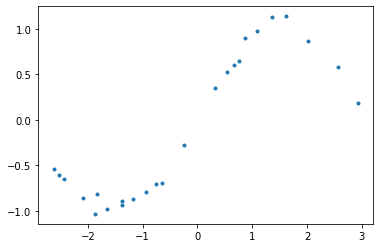

In [0]:
# Create data points
X, y = generate_points()
plt.plot(X, y, '.')
plt.show()

To fit a Gaussian Process, you will need to define a kernel. For Gaussian (GBF) kernel you can use `GPy.kern.RBF` function.

<b> Task 1.1: </b> Create RBF kernel with variance 1.5 and length-scale parameter 2 for 1D samples and compute value of the kernel between points `X[5]` and `X[9]`. Submit a single number. 
<br><b>Hint:</b> use `.K` property of kernel object.

In [0]:
X[None, 5]

array([[2.56198229]])

In [0]:
kernel = GPy.kern.RBF(input_dim=1, variance=1.5, lengthscale=2)
kernel_59 = kernel.K(X[None, 5], X[None, 9])

In [0]:
kernel_59

array([[1.04618135]])

In [0]:
grader.submit_GPy_1(kernel_59[0][0])

Current answer for task 1.1 is: 1.0461813545396959


<b> Task 1.2: </b> Fit GP into generated data. Use kernel from previous task. Submit predicted mean and vairance at position $x=1$.
<br><b>Hint:</b> use `GPy.models.GPRegression` class.

In [0]:
model = GPy.models.GPRegression(X, y, kernel)

In [0]:
display(model)

{'dataplot': [<matplotlib.collections.PathCollection at 0x7f8ed2b14e10>],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f8ed2b233c8>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f8ed2b14dd8>]]}

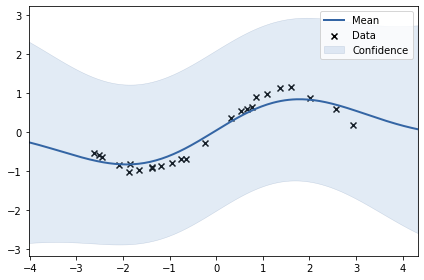

In [0]:
model.plot()

In [0]:
pred = model.predict(np.array([1])[:, None])

In [0]:
mean = pred[0][0][0]
variance = pred[1][0][0]
grader.submit_GPy_2(mean, variance)

Current answer for task 1.2 (mean) is: 0.6646774926102937
Current answer for task 1.2 (variance) is: 1.1001478223790582


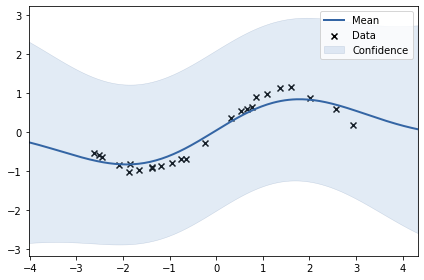

In [0]:
model.plot()
plt.show()

We see that the model didn't fit the data quite well. Let's try to fit kernel and noise parameters automatically as discussed in the lecture! You can see the current parameters below:

In [0]:
model

<b> Task 1.3: </b> Optimize length-scale, variance and noise component of the model and submit optimal length-scale value of the kernel. 
<br><b>Hint:</b> Use `.optimize()` function of the model and `.lengthscale` property of the kernel.

In [0]:
kernel.lengthscale

GP_regression.rbf.lengthscale:
Param([2.])

In [0]:
model.optimize_restarts(num_restarts = 10)
grader.submit_GPy_3(kernel.lengthscale)

Optimization restart 1/10, f = -18.35176775416764
Optimization restart 2/10, f = -18.35176775416548
Optimization restart 3/10, f = -18.351767753770215
Optimization restart 4/10, f = -18.35176775405341
Optimization restart 5/10, f = -18.351767754163447
Optimization restart 6/10, f = -18.35176775415924
Optimization restart 7/10, f = -18.351767754136468
Optimization restart 8/10, f = -18.351767754149027
Optimization restart 9/10, f = -18.351767754166595
Optimization restart 10/10, f = -18.351767754166875
Current answer for task 1.3 is: 1.6252681650349912


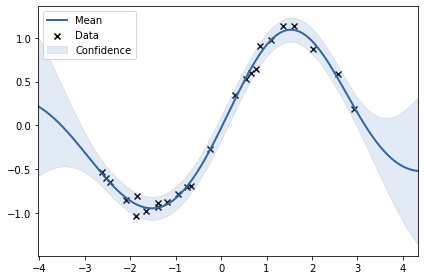

In [0]:
model.plot()
plt.show()

As you see, the process generates outputs just right. Let's see if GP can figure out itself when we try to fit it into noise or signal.

<b> Task 1.4: </b> Generate two datasets: sinusoid wihout noise and samples from gaussian noise. Optimize kernel parameters and submit optimal values of noise component.
<br><b>Note:</b> generate data only using ```generate_points(n, noise_variance)``` and ```generate_noise(n, noise_variance)``` function!

In [0]:
X, y = generate_noise(noise_variance=10)
kernel = GPy.kern.RBF(input_dim=1)
model = GPy.models.GPRegression(X, y, kernel)
model.optimize_restarts(num_restarts = 10)
noise = model.Gaussian_noise.variance[0]
print(noise)

Optimization restart 1/10, f = 67.99804116683949
Optimization restart 2/10, f = 67.99804116643664
Optimization restart 3/10, f = 67.99804116870081
Optimization restart 4/10, f = 67.99804116796366
Optimization restart 5/10, f = 67.99804116896242
Optimization restart 6/10, f = 67.9980411680768
Optimization restart 7/10, f = 67.99804116626972
Optimization restart 8/10, f = 67.9980411663141
Optimization restart 9/10, f = 67.99804117747829
Optimization restart 10/10, f = 67.99804116671655
10.143337495841973


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f8ed5bccb70>],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f8ed5bcc550>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f8ed5bccdd8>]]}

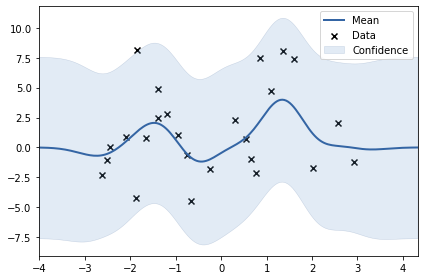

In [0]:
model.plot()

In [0]:
X, y = generate_points(noise_variance=0)
kernel = GPy.kern.RBF(input_dim=1)
model = GPy.models.GPRegression(X, y, kernel)
model.optimize_restarts(num_restarts = 10)
just_signal = model.Gaussian_noise.variance[0]
print(just_signal)

Optimization restart 1/10, f = -140.28955684284313
Optimization restart 2/10, f = -140.28953678097383
Optimization restart 3/10, f = -140.28958599232678
Optimization restart 4/10, f = -140.28958603437604
Optimization restart 5/10, f = -140.28958334204145
Optimization restart 6/10, f = -140.28958537454318
Optimization restart 7/10, f = -140.28957916833195
Optimization restart 8/10, f = -140.28958334211472
Optimization restart 9/10, f = -140.28958460878556
Optimization restart 10/10, f = -140.28958463424073
3.682463883486201e-30


{'dataplot': [<matplotlib.collections.PathCollection at 0x7f8ed554bc88>],
 'gpconfidence': [<matplotlib.collections.PolyCollection at 0x7f8ed554bc50>],
 'gpmean': [[<matplotlib.lines.Line2D at 0x7f8ed554bf60>]]}

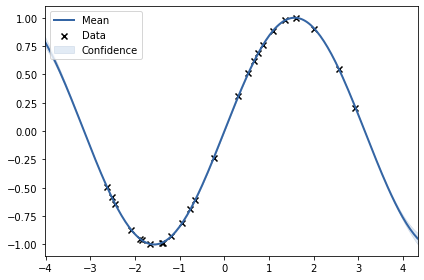

In [0]:
model.plot()

In [0]:
grader.submit_GPy_4(noise, just_signal)

Current answer for task 1.4 (noise) is: 10.143337495841973
Current answer for task 1.4 (just signal) is: 3.682463883486201e-30


## Sparse GP
Now let's consider the speed of GP. We will generate a dataset of 3000 points and measure the time that is consumed for prediction of mean and variance for each point. We will then try to use inducing inputs and find the optimal number of points according to quality-time tradeoff.

For the sparse model with inducing points, you should use ```GPy.models.SparseGPRegression``` class. You can set the number of inducing inputs with parameter ```num_inducing``` and optimize their positions and values with ```.optimize()``` call.

<b>Task 1.5</b>: Create a dataset of 1000 points and fit GPRegression. Measure time for predicting mean and variance at position $x=1$. Then fit `SparseGPRegression` with 10 inducing inputs and repeat the experiment. Report speedup as a ratio between consumed time without and with inducing inputs.

In [0]:
X, y = generate_points(1000)

In [0]:
kernel = GPy.kern.RBF(input_dim=1)
model = GPy.models.GPRegression(X, y, kernel)
model.optimize(messages=True)

start = time.time()
pred = model.predict(np.array([1])[:, None])
time_gp = time.time()-start

In [0]:
time_gp

0.002919435501098633

In [0]:
kernel = GPy.kern.RBF(input_dim=1)
model = GPy.models.SparseGPRegression(X, y, kernel, num_inducing=10)
model.optimize(messages=True)

start = time.time()
pred = model.predict(np.array([1])[:, None])
time_sgp = time.time()-start

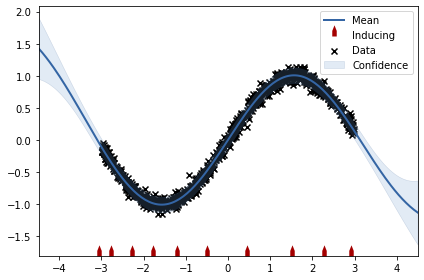

In [0]:
model.plot()
plt.show()

In [0]:
grader.submit_GPy_5(time_gp / time_sgp)

Current answer for task 1.5 is: 3.1502444044250066


## Bayesian optimization: GPyOpt (<a href="http://pythonhosted.org/GPyOpt/">documentation</a>, <a href="http://nbviewer.jupyter.org/github/SheffieldML/GPyOpt/blob/master/manual/index.ipynb">tutorials</a>)

In this part of the assignment, we will try to find optimal hyperparameters to XGBoost model! We will use data from a small competition to speed things up, but keep in mind that the approach works even for large datasets.

We will use diabetes dataset provided in sklearn package.

In [0]:
dataset = sklearn.datasets.load_diabetes()
X = dataset['data']
y = dataset['target']

We will use cross-validation score to estimate accuracy and our goal will be to tune: ```max_depth```, ```learning_rate```, ```n_estimators``` parameters. The baseline MSE with default XGBoost parameters is $0.2$. Let's see if we can do better. First, we have to define optimization function and domains.

In [0]:
# Score. Optimizer will try to find minimum, so we will add a "-" sign.
def f(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        XGBRegressor(learning_rate=parameters[0],
                     max_depth=int(parameters[2]),
                     n_estimators=int(parameters[3]),
                     gamma=int(parameters[1]),
                     min_child_weight = parameters[4]), 
        X, y, scoring='neg_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

In [0]:
baseline = -cross_val_score(
    XGBRegressor(), X, y, scoring='neg_mean_squared_error'
).mean()
baseline

[17:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:38:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


3437.074407214106

In [0]:
# Bounds (NOTE: define continuous variables first, then discrete!)
bounds = [
    {'name': 'learning_rate',
     'type': 'continuous',
     'domain': (0, 1)},

    {'name': 'gamma',
     'type': 'continuous',
     'domain': (0, 5)},

    {'name': 'max_depth',
     'type': 'discrete',
     'domain': (1, 50)},

    {'name': 'n_estimators',
     'type': 'discrete',
     'domain': (1, 300)},

    {'name': 'min_child_weight',
     'type': 'discrete',
     'domain': (1, 10)}
]

In [0]:
np.random.seed(777)
optimizer = GPyOpt.methods.BayesianOptimization(
    f=f, domain=bounds,
    acquisition_type ='MPI',
    acquisition_par = 0.1,
    exact_eval=True
)

In [0]:
max_iter = 50
max_time = 60
optimizer.run_optimization(max_iter, max_time)

In [0]:
optimizer.plot_acquisition()
plt.show()

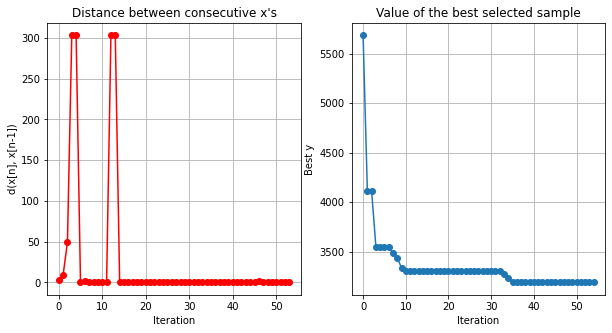

In [0]:
optimizer.plot_convergence()

Best values of parameters:

In [0]:
optimizer.X[np.argmin(optimizer.Y)]

array([4.76325090e-02, 1.19202751e+00, 1.00000000e+00, 3.00000000e+02,
       1.00000000e+00])

In [0]:
print('MSE:', np.min(optimizer.Y),
      'Gain:', baseline/np.min(optimizer.Y)*100)

MSE: 3189.185708011576 Gain: 107.77278973061391


We were able to get 9% boost without tuning parameters by hand! Let's see if you can do the same. 

<b>Task 2.1:</b> Tune SVR model. Find optimal values for three parameters: `C`, `epsilon` and `gamma`. Use range (1e-5, 1000) for `C`, (1e-5, 10) for `epsilon` and `gamma`. Use MPI as an acquisition function with weight 0.1. Submit the optimal value of epsilon that was found by a model.

In [0]:
def svr_cv(parameters):
    parameters = parameters[0]
    score = -cross_val_score(
        SVR(
            C=parameters[0],
            epsilon=parameters[1],
            gamma=parameters[2],
            ),
        X, y, scoring='neg_mean_squared_error'
    ).mean()
    score = np.array(score)
    return score

In [0]:
svr_bounds = [
    {'name': 'C',
     'type': 'continuous',
     'domain': (1e-5, 1000)},

    {'name': 'epsilon',
     'type': 'continuous',
     'domain': (1e-5, 10)},

    {'name': 'gamma',
     'type': 'continuous',
     'domain': (1e-5, 10)},
]

In [0]:
np.random.seed(777)
optimizer = GPyOpt.methods.BayesianOptimization(
    f=svr_cv, domain=svr_bounds,
    acquisition_type ='MPI',
    acquisition_par = 0.1,
    exact_eval=True
)

In [0]:
max_iter = 50
max_time = 60
optimizer.run_optimization(max_iter, max_time)

In [0]:
best_epsilon = optimizer.X[np.argmin(optimizer.Y)][1]
grader.submit_GPyOpt_1(best_epsilon)

Current answer for task 2.1 is: 10.0


<b>Task 2.2:</b> For the model above submit boost in improvement that you got after tuning hyperparameters (output percents) [e.g. if baseline MSE was 40 and you got 20, output number 200]

In [0]:
baseline = -cross_val_score(
    SVR(), X, y, scoring='neg_mean_squared_error'
).mean()
baseline

4976.655882526393

In [0]:
optimizer_mse = np.min(optimizer.Y)
performance_boost = baseline / optimizer_mse * 100
print('MSE:', optimizer_mse,
      'Gain:', performance_boost)

MSE: 2961.041686351188 Gain: 168.0711185346057


In [0]:
grader.submit_GPyOpt_2(performance_boost)

Current answer for task 2.2 is: 168.0711185346057


# Authorization & Submission
To submit assignment parts to Cousera platform, please, enter your e-mail and token into variables below. You can generate a token on this programming assignment's page. <b>Note:</b> The token expires 30 minutes after generation.

In [0]:
STUDENT_EMAIL = # EMAIL HERE
STUDENT_TOKEN = # TOKEN HERE
grader.status()

If you want to submit these answers, run cell below

In [0]:
grader.submit(STUDENT_EMAIL, STUDENT_TOKEN)